<a href="https://colab.research.google.com/github/srujayreddyv/CSUS-CSC177-DataAnalyticsAndMining/blob/main/labs/Tutorial5_Regression_Srujay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5: Regression

The following tutorial contains Python examples for solving regression problems. You should refer to the Appendix chapter on regression of the "Introduction to Data Mining" book to understand some of the concepts introduced in this tutorial.

Regression is a modeling technique for predicting quantitative-valued target attributes. The goals for this tutorial are as follows:
1. To provide examples of using different regression methods from the scikit-learn library package.
2. To demonstrate the problem of model overfitting due to correlated attributes in the data.
3. To illustrate how regularization can be used to avoid model overfitting.

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.

## Synthetic Data Generation

To illustrate how linear regression works, we first generate a random 1-dimensional vector of predictor variables, x, from a uniform distribution. The response variable y has a linear relationship with x according to the following equation:  y = -3x + 1 + epsilon, where epsilon corresponds to random noise sampled from a Gaussian distribution with mean 0 and standard deviation of 1.

Text(0, 0.5, 'y')

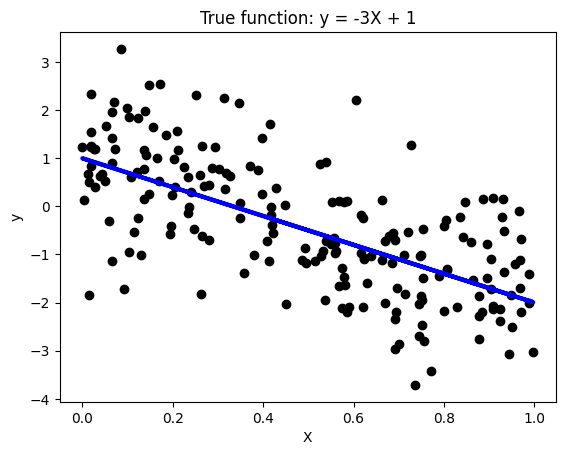

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

seed = 1            # seed for random number generation
numInstances = 200  # number of data instances
np.random.seed(seed)
X = np.random.rand(numInstances,1).reshape(-1,1)
y_true = -3*X + 1
y = y_true + np.random.normal(size=numInstances).reshape(-1,1)

plt.scatter(X, y,  color='black')
plt.plot(X, y_true, color='blue', linewidth=3)
plt.title('True function: y = -3X + 1')
plt.xlabel('X')
plt.ylabel('y')

## Multiple Linear Regression

In this example, we illustrate how to use Python scikit-learn package to fit a multiple linear regression (MLR) model. Given a training set {X,y}, MLR is designed to learn the regression function $f(X,w) = X^T w + w_0$ by minimizing the following loss function given a training set $\{X_i,y_i\}_{i=1}^N$:
$$L(y,f(X,w)) = \sum_{i=1}^N \|y_i - X_i w - w_0\|^2,$$
where $w$ (slope) and $w_0$ (intercept) are the regression coefficients.

Given the input dataset, the following steps are performed:
1. Split the input data into their respective training and test sets.
2. Fit multiple linear regression to the training data.
3. Apply the model to the test data.
4. Evaluate the performance of the model.
5. Postprocessing: Visualizing the fitted model.

#### Step 1: Split Input Data into Training and Test Sets

In [2]:
numTrain = 20   # number of training instances
numTest = numInstances - numTrain

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

#### Step 2: Fit Regression Model to Training Set

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

LinearRegression()

#### Step 3: Apply Model to the Test Set

In [4]:
# Apply model to the test set
y_pred_test = regr.predict(X_test)

#### Step 4: Evaluate Model Performance on Test Set

Root mean squared error = 1.0476
R-squared = 0.4443


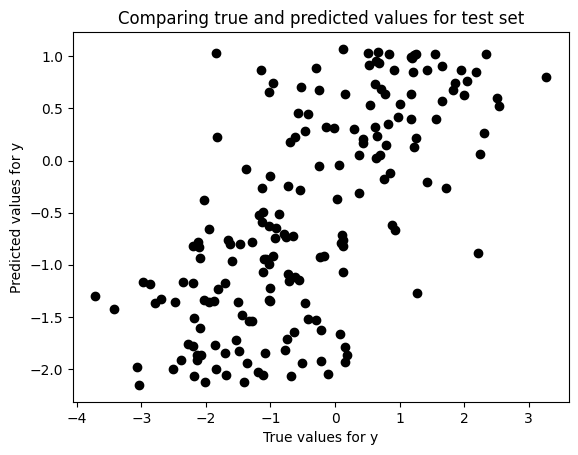

In [5]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

#### Step 5: Postprocessing

Slope =  -3.2423545446565036
Intercept =  1.0805993038584842


Text(0, 0.5, 'y')

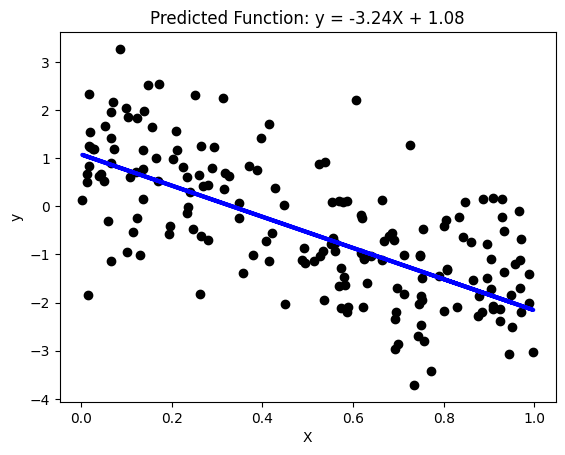

In [6]:
# Display model parameters
print('Slope = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0])### Step 4: Postprocessing

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')

## Effect of Correlated Attributes

In this example, we illustrate how the presence of correlated attributes can affect the performance of regression models. Specifically, we create 4 additional variables, X2, X3, X4, and X5 that are strongly correlated with the previous variable X created in Section 5.1. The relationship between X and y remains the same as before. We then fit y against the predictor variables and compare their training and test set errors.

First, we create the correlated attributes below.

Text(0.5, 1.0, 'Correlation between X4 and X5 = 0.9190')

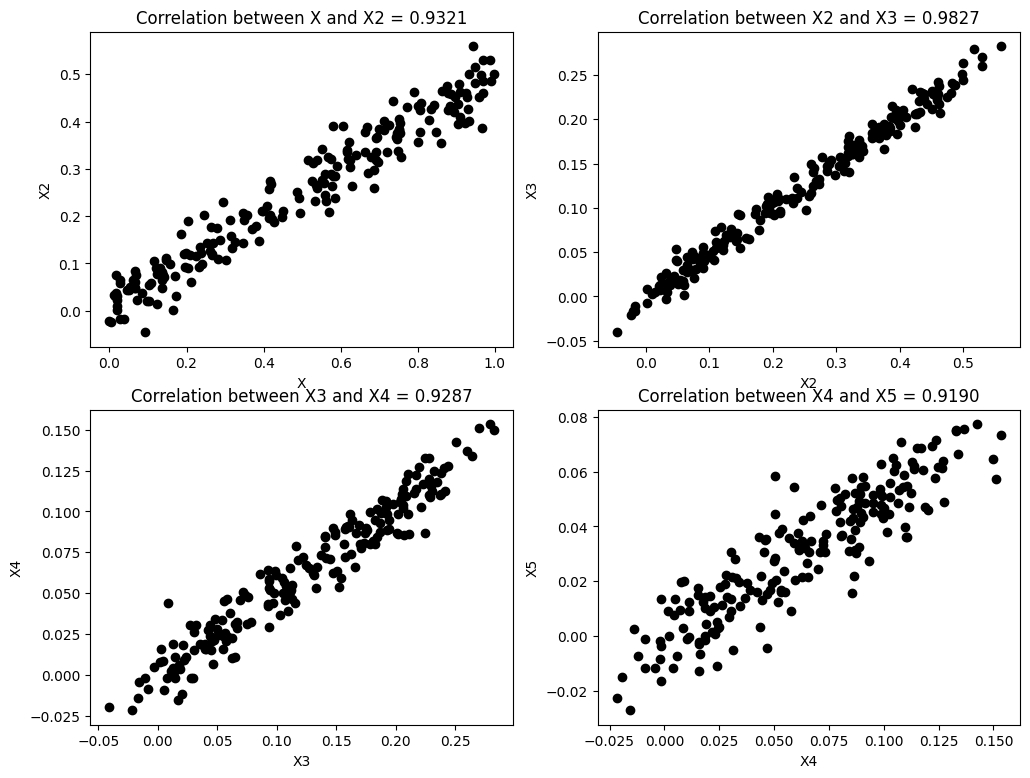

In [7]:
seed = 1
np.random.seed(seed)
X2 = 0.5*X + np.random.normal(0, 0.04, size=numInstances).reshape(-1,1)
X3 = 0.5*X2 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)
X4 = 0.5*X3 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)
X5 = 0.5*X4 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,9))
ax1.scatter(X, X2, color='black')
ax1.set_xlabel('X')
ax1.set_ylabel('X2')
c = np.corrcoef(np.column_stack((X[:-numTest],X2[:-numTest])).T)
titlestr = 'Correlation between X and X2 = %.4f' % (c[0,1])
ax1.set_title(titlestr)

ax2.scatter(X2, X3, color='black')
ax2.set_xlabel('X2')
ax2.set_ylabel('X3')
c = np.corrcoef(np.column_stack((X2[:-numTest],X3[:-numTest])).T)
titlestr = 'Correlation between X2 and X3 = %.4f' % (c[0,1])
ax2.set_title(titlestr)

ax3.scatter(X3, X4, color='black')
ax3.set_xlabel('X3')
ax3.set_ylabel('X4')
c = np.corrcoef(np.column_stack((X3[:-numTest],X4[:-numTest])).T)
titlestr = 'Correlation between X3 and X4 = %.4f' % (c[0,1])
ax3.set_title(titlestr)

ax4.scatter(X4, X5, color='black')
ax4.set_xlabel('X4')
ax4.set_ylabel('X5')
c = np.corrcoef(np.column_stack((X4[:-numTest],X5[:-numTest])).T)
titlestr = 'Correlation between X4 and X5 = %.4f' % (c[0,1])
ax4.set_title(titlestr)

Next, we create 4 additional versions of the training and test sets. The first version, X_train2 and X_test2 have 2 correlated predictor variables, X and X2. The second version, X_train3 and X_test3 have 3 correlated predictor variables, X, X2, and X3. The third version have 4 correlated variables, X, X2, X3, and X4 whereas the last version have 5 correlated variables, X, X2, X3, X4, and X5.

In [8]:
X_train2 = np.column_stack((X[:-numTest],X2[:-numTest]))
X_test2 = np.column_stack((X[-numTest:],X2[-numTest:]))
X_train3 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest]))
X_test3 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:]))
X_train4 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest]))
X_test4 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:]))
X_train5 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest],X5[:-numTest]))
X_test5 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:],X5[-numTest:]))

Below, we train 4 new regression models based on the 4 versions of training and test data created in the previous step.

In [9]:
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train)

regr3 = linear_model.LinearRegression()
regr3.fit(X_train3, y_train)

regr4 = linear_model.LinearRegression()
regr4.fit(X_train4, y_train)

regr5 = linear_model.LinearRegression()
regr5.fit(X_train5, y_train)

LinearRegression()

All 4 versions of the regression models are then applied to the training and test sets.

In [10]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)
y_pred_train2 = regr2.predict(X_train2)
y_pred_test2 = regr2.predict(X_test2)
y_pred_train3 = regr3.predict(X_train3)
y_pred_test3 = regr3.predict(X_test3)
y_pred_train4 = regr4.predict(X_train4)
y_pred_test4 = regr4.predict(X_test4)
y_pred_train5 = regr5.predict(X_train5)
y_pred_test5 = regr5.predict(X_test5)

For postprocessing, we compute both the training and test errors of the models. We can also show the resulting model and the sum of the absolute weights of the regression coefficients, i.e., $\sum_{j=0}^d |w_j|$, where $d$ is the number of predictor attributes.

,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927


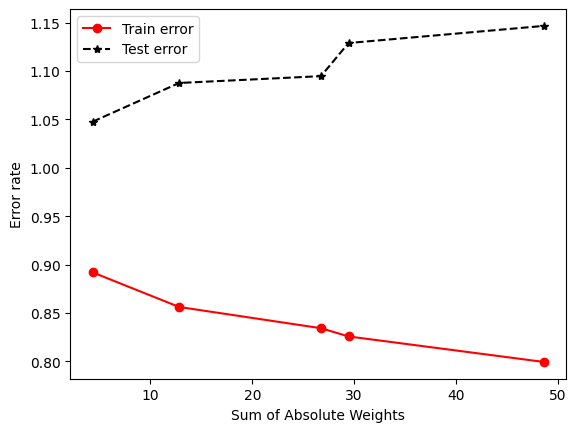

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ['Model', 'Train error', 'Test error', 'Sum of Absolute Weights']
model1 = "%.2f X + %.2f" % (regr.coef_[0][0], regr.intercept_[0])
values1 = [ model1, np.sqrt(mean_squared_error(y_train, y_pred_train)),
           np.sqrt(mean_squared_error(y_test, y_pred_test)),
           np.absolute(regr.coef_[0]).sum() + np.absolute(regr.intercept_[0])]

model2 = "%.2f X + %.2f X2 + %.2f" % (regr2.coef_[0][0], regr2.coef_[0][1], regr2.intercept_[0])
values2 = [ model2, np.sqrt(mean_squared_error(y_train, y_pred_train2)),
           np.sqrt(mean_squared_error(y_test, y_pred_test2)),
           np.absolute(regr2.coef_[0]).sum() + np.absolute(regr2.intercept_[0])]

model3 = "%.2f X + %.2f X2 + %.2f X3 + %.2f" % (regr3.coef_[0][0], regr3.coef_[0][1],
                                                regr3.coef_[0][2], regr3.intercept_[0])
values3 = [ model3, np.sqrt(mean_squared_error(y_train, y_pred_train3)),
           np.sqrt(mean_squared_error(y_test, y_pred_test3)),
           np.absolute(regr3.coef_[0]).sum() + np.absolute(regr3.intercept_[0])]

model4 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (regr4.coef_[0][0], regr4.coef_[0][1],
                                        regr4.coef_[0][2], regr4.coef_[0][3], regr4.intercept_[0])
values4 = [ model4, np.sqrt(mean_squared_error(y_train, y_pred_train4)),
           np.sqrt(mean_squared_error(y_test, y_pred_test4)),
           np.absolute(regr4.coef_[0]).sum() + np.absolute(regr4.intercept_[0])]

model5 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (regr5.coef_[0][0],
                                        regr5.coef_[0][1], regr5.coef_[0][2],
                                        regr5.coef_[0][3], regr5.coef_[0][4], regr5.intercept_[0])
values5 = [ model5, np.sqrt(mean_squared_error(y_train, y_pred_train5)),
           np.sqrt(mean_squared_error(y_test, y_pred_test5)),
           np.absolute(regr5.coef_[0]).sum() + np.absolute(regr5.intercept_[0])]

results = pd.DataFrame([values1, values2, values3, values4, values5], columns=columns)

plt.plot(results['Sum of Absolute Weights'], results['Train error'], 'ro-')
plt.plot(results['Sum of Absolute Weights'], results['Test error'], 'k*--')
plt.legend(['Train error', 'Test error'])
plt.xlabel('Sum of Absolute Weights')
plt.ylabel('Error rate')

results

The results above show that the first model, which fits y against X only, has the largest training error, but smallest test error, whereas the fifth model, which fits y against X and other correlated attributes, has the smallest training error but largest test error. This is due to a phenomenon known as model overfitting, in which the low training error of the model does not reflect how well the model will perform on previously unseen test instances. From the plot shown above, observe that the disparity between the training and test errors becomes wider as the sum of absolute weights of the model (which represents the model complexity) increases. Thus, one should control the complexity of the regression model to avoid the model overfitting problem.  

## Ridge Regression

Ridge regression is a variant of MLR designed to fit a linear model to the dataset by minimizing the following regularized least-square loss function:
$$L_{\textrm{ridge}}(y,f(X,w)) = \sum_{i=1}^N \|y_i - X_iw - w_0\|^2 + \alpha \bigg[\|w\|^2 + w_0^2 \bigg],$$
where $\alpha$ is the hyperparameter for ridge regression. Note that the ridge regression model reduces to MLR when $\alpha = 0$. By increasing the value of $\alpha$, we can control the complexity of the model as will be shown in the example below.

In the example shown below, we fit a ridge regression model to the previously created training set with correlated attributes. We compare the results of the ridge regression model against those obtained using MLR.

In [12]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=0.4)
ridge.fit(X_train5, y_train)
y_pred_train_ridge = ridge.predict(X_train5)
y_pred_test_ridge = ridge.predict(X_test5)

model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (ridge.coef_[0][0],
                                        ridge.coef_[0][1], ridge.coef_[0][2],
                                        ridge.coef_[0][3], ridge.coef_[0][4], ridge.intercept_[0])
values6 = [ model6, np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)),
           np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_[0])]

ridge_results = pd.DataFrame([values6], columns=columns, index=['Ridge'])
pd.concat([results, ridge_results])

,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927
Ridge,-2.24 X + -0.43 X2 + -0.14 X3 + -0.10 X4 + 0.0...,0.917456,1.052388,3.765759


By setting an appropriate value for the hyperparameter, $\alpha$, we can control the sum of absolute weights, thus producing a test error that is quite comparable to that of MLR without the correlated attributes.

## Lasso Regression

One of the limitations of ridge regression is that, although it was able to reduce the regression coefficients associated with the correlated attributes and reduce the effect of model overfitting, the resulting model is still not sparse. Another variation of MLR, called lasso regression, is designed to produce sparser models by imposing an $\ell_1$ regularization on the regression coefficients as shown below:
$$L_{\textrm{lasso}}(y,f(X,w)) = \sum_{i=1}^N \|y_i - X_iw - w_0\|^2 + \alpha \bigg[ \|w\|_1 + |w_0|\bigg]$$

The example code below shows the results of applying lasso regression to the previously used correlated dataset.

In [13]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.02)
lasso.fit(X_train5, y_train)
y_pred_train_lasso = lasso.predict(X_train5)
y_pred_test_lasso = lasso.predict(X_test5)

model7 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (lasso.coef_[0],
                                        lasso.coef_[1], lasso.coef_[2],
                                        lasso.coef_[3], lasso.coef_[4], lasso.intercept_[0])
values7 = [ model7, np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)),
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_[0])]

lasso_results = pd.DataFrame([values7], columns=columns, index=['Lasso'])
pd.concat([results, ridge_results, lasso_results])

,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927
Ridge,-2.24 X + -0.43 X2 + -0.14 X3 + -0.10 X4 + 0.0...,0.917456,1.052388,3.765759
Lasso,-2.90 X + 0.00 X2 + 0.00 X3 + 0.00 X4 + 0.00 X...,0.895692,1.043334,3.856242


Observe that the lasso regression model sets the coefficients for the correlated attributes, X2, X3, X4, and X5 to exactly zero unlike the ridge regression model. As a result, its test error is significantly better than that for ridge regression.

## Regression in Real Dataset - Stock Price Prediction

### Useful functions

In [14]:
#Function to normalize columns
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)


In [15]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [16]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()


### Data Pre-Processing

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#Read Stock_Price_MAX.csv file and load data into stock_df dataframe
stock_df= pd.read_csv('data/Stock_Price_MAX.csv')
stock_df[0:5]

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [ ]:
stock_df = stock_df.drop(['Date', 'Adj_Close'], axis = 1)
stock_df[0:5]

,Open,High,Low,Close,Volume
0,3.812500,4.156250,3.812500,4.125000,3675600
1,4.125000,4.125000,4.000000,4.015625,1077600
2,4.000000,4.031250,3.953125,4.000000,437200
3,4.000000,4.000000,3.843750,3.843750,1883600
4,3.734375,3.734375,3.390625,3.390625,7931600


In [ ]:
# Normalize the input columns

normalize_numeric_minmax(stock_df,"Open")
normalize_numeric_minmax(stock_df,"High")
normalize_numeric_minmax(stock_df,"Low")
normalize_numeric_minmax(stock_df,"Volume")
stock_df[0:5]

,Open,High,Low,Close,Volume
0,0.004378,0.006469,0.006934,4.125000,0.075401
1,0.007031,0.006205,0.008535,4.015625,0.019194
2,0.005970,0.005413,0.008135,4.000000,0.005339
3,0.005970,0.005149,0.007201,3.843750,0.036632
4,0.003714,0.002904,0.003334,3.390625,0.167478


In [ ]:
# to xy to convert pandas to tensor flow
x,y=to_xy(stock_df,"Close")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#Split for train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape

(3074, 4)

In [ ]:
x_test.shape

(1318, 4)

In [ ]:
y_train.shape

(3074,)

In [ ]:
y_test.shape

(1318,)

### Train Model - SKLearn

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
stock_regr = linear_model.LinearRegression()

# Fit regression model to the training set
stock_regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Prediction and Model Evaluation

In [ ]:
y_pred = stock_regr.predict(x_test)


In [ ]:
for i in range(10):
    print("True price : ",y_test[i],"Prediction : ", y_pred[i])

True price :  119.72 Prediction :  119.59525
True price :  46.7 Prediction :  46.442554
True price :  12.9675 Prediction :  12.94248
True price :  6.1 Prediction :  6.070262
True price :  77.55 Prediction :  78.00407
True price :  24.695 Prediction :  24.462349
True price :  78.03 Prediction :  77.87387
True price :  6.77 Prediction :  6.7446566
True price :  5.785 Prediction :  5.731415
True price :  8.1425 Prediction :  8.118291


In [ ]:
print(stock_regr.coef_, stock_regr.intercept_)

[-66.10664     91.223724    92.60901     -0.16484131] 3.150711


Root mean squared error = 0.2725
R-squared = 0.9999


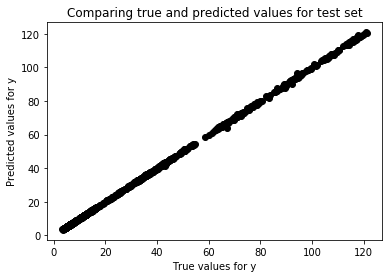

In [ ]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

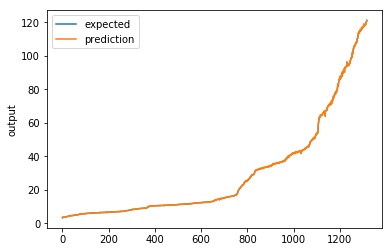

In [ ]:
chart_regression(y_pred,y_test)

### Train Model - Neural Network

In [ ]:
# Imports

from keras import Sequential
from keras.layers.core import Dense

Using TensorFlow backend.


In [ ]:
# Build network
model_relu = Sequential()
model_relu.add(Dense(60, input_dim=x_train.shape[1], activation='relu'))
model_relu.add(Dense(30, activation='relu')) # Hidden 2
model_relu.add(Dense(1)) # Output
model_relu.compile(loss='mean_squared_error', optimizer='adam')
model_relu.fit(x_train,y_train,verbose=1,epochs=100)

Epoch 1/100
3074/3074 [==============================] - 0s 85us/step - loss: 1748.1590
Epoch 2/100
3074/3074 [==============================] - 0s 23us/step - loss: 935.9215
Epoch 3/100
3074/3074 [==============================] - 0s 24us/step - loss: 186.7690
Epoch 4/100
3074/3074 [==============================] - 0s 24us/step - loss: 70.0821
Epoch 5/100
3074/3074 [==============================] - 0s 23us/step - loss: 15.1783
Epoch 6/100
3074/3074 [==============================] - 0s 23us/step - loss: 1.0733
Epoch 7/100
3074/3074 [==============================] - 0s 24us/step - loss: 0.2042
Epoch 8/100
3074/3074 [==============================] - 0s 23us/step - loss: 0.1840
Epoch 9/100
3074/3074 [==============================] - 0s 23us/step - loss: 0.1782
Epoch 10/100
3074/3074 [==============================] - 0s 24us/step - loss: 0.1816
Epoch 11/100
3074/3074 [==============================] - 0s 26us/step - loss: 0.1756
Epoch 12/100
3074/3074 [==============================

3074/3074 [==============================] - 0s 25us/step - loss: 0.1720
Epoch 97/100
3074/3074 [==============================] - 0s 22us/step - loss: 0.1746
Epoch 98/100
3074/3074 [==============================] - 0s 22us/step - loss: 0.1738
Epoch 99/100
3074/3074 [==============================] - 0s 23us/step - loss: 0.1709
Epoch 100/100
3074/3074 [==============================] - 0s 23us/step - loss: 0.1759


### Prediction and Model Evaluation

In [ ]:
# Predict Price
y_pred_nn = model_relu.predict(x_test)
print("Shape: {}".format(y_pred_nn.shape))

Shape: (1318, 1)


In [ ]:
# Measure RMS error.  RMSE is common for regression.

score_nn = np.sqrt(mean_squared_error(y_test,y_pred_nn))
print("Final score (RMSE): {}".format(score_nn))
print('R2 score: %.2f' % r2_score(y_test, y_pred_nn))

Final score (RMSE): 0.42891180515289307
R2 score: 1.00


Text(0, 0.5, 'Predicted values for y')

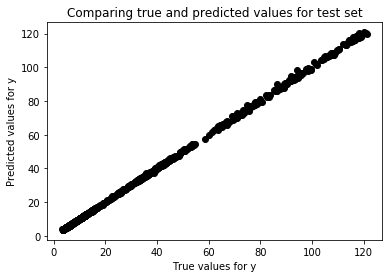

In [ ]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_nn, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

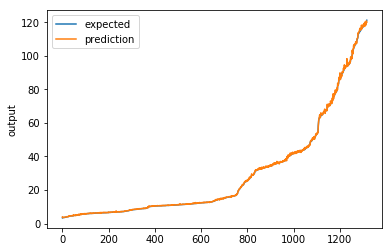

In [ ]:
#Regression lift Chart
chart_regression(y_pred_nn.flatten(),y_test)